# MN5813 Individual Assessment
| Candidate Number  | 2504189                    |
| :----------------: | :------------------------: |
| Level             | 7(Postgraduate)          |
| Course Name       | MSc Business Analytics   |
| Module code       | MN5813                  |
| Module tutor      | Alex Reppel              |
| Assignment | Individual assignment    |
| Assignment title  | TFL Traffic and Crime |
| Github            | https://github.com/arsalanparacha/tfl |




## Project Summary

This project is an analysis of crime and journey volume of different modes of public transport in london. The project uses two datasets, crime and journey volume, and merges them to find the correlation between the two. The project also only focuses on the most popular public transport modes by volume of journeys including bus, underground, overground, rail and tram. The project looks at historical data from 2010 to 2024 and compares for trends and patterns.

## Generative AI

Name and Version: ChatGPT (Version: January 2024) by OpenAI
URL: https://chat.openai.com
Generative AI was used to edit code and suggest alterations. Mostly in case of errors, it was used to understand the problem occurring and make changes to the code to avoid those problems. In some cases it was also used to suggest functions and how each of their element work.

## Introduction

Public transport systems are crucial to facilitate the travel of millions of people each day. But the problem of public security within the networks has become a big issue especially for the developed cities like London which are dependent on millions of commuters using Buses, London Underground/DLR, Overground, Tramlink and TfL Rail. Understanding how crime volume relates to the number of journeys made is critical in strategies of safety measures as proposed by the policy makers.
This report uses the historical data to analyze the crime patterns among the different modes of transport in London. It determines the crime patterns of each month and matches it with the volume of transport used to estimate the period where there is maximum or minimum risk. Most importantly, the volume of crimes for the London Underground systems was consistently higher than others while Tramlink and Overground had lower crime volumes.
There is a seasonal relationship between the number of people using the transport system and the volume of crime recorded with crime volume peaking in summer and the month of December during holidays. This trend advocates for seasonal trends of managing crime such as increased use of CCTV cameras on surveillance, increased patrol and public education and awareness campaigns
The results highlight evidence that can assist the transport authorities designing specific policies aimed at enhancing safety measures and make it safer for people using transport tems in London.
Previous studies in studying crime whilst commuting have put forward the need for targeted strategies by pointing out the crime risks posed by the underground mass transit systems (Newton, Partridge, & Gill, 2014). Also, the London Assembly has generated reports which assess the levels of violent crimes in the public transportation system and sets recommendations for future policing efforts, which were previously identified as some of the policing challenges (London Assembly Police and Crime Committee, 2015).n.

 system.

## Setup
### Import Libraries

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [101]:
#Loading Data from Github repository
crime_url = 'https://raw.githubusercontent.com/arsalanparacha/tfl/refs/heads/main/public-transport-crime-london.csv'
crime_df = pd.read_csv(crime_url) 

journey_url = 'https://raw.githubusercontent.com/arsalanparacha/tfl/refs/heads/main/tfl-journeys-type.csv'
journey_df = pd.read_csv(journey_url)

#Printing dataframes
print(crime_df)
print(journey_df)

      Year      Month       Transport Mode Volume   Rate  Unnamed: 5  \
0      2009     April                  Bus   2,066  11.3         NaN   
1      2009       May                  Bus   2,148  11.1         NaN   
2      2009      June                  Bus   2,141  11.1         NaN   
3      2009      July                  Bus   2,149  11.2         NaN   
4      2009    August                  Bus   1,745   9.7         NaN   
...     ...       ...                  ...     ...   ...         ...   
1039   2023  November  All transport modes   4,591  14.6         NaN   
1040   2023  December  All transport modes   4,341  15.1         NaN   
1041   2024   January  All transport modes   3,955  13.8         NaN   
1042   2024  February  All transport modes   4,140  14.3         NaN   
1043   2024     March  All transport modes   4,080  13.3         NaN   

      Unnamed: 6  Unnamed: 7  Unnamed: 8  
0            NaN         NaN         NaN  
1            NaN         NaN         NaN  
2     

###### *Links to source datasets*
###### crime dataset: https://data.london.gov.uk/dataset/transport-crime-london
###### traffic dataset : https://data.london.gov.uk/dataset/public-transport-journeys-type-transport

###### Notes: 
###### Crime dataset originally existed in a very complex table format that was difficult to transform into a tall table using python hence this was done manually using MS Excel. 
###### Both datasets existed in xls format with multiple sheets, revelant sheets were exported as csv and uploaded to github. 

## Data Management
### Data Cleaning
##### 1. removing extra columns 
##### 2. removing null values
##### 3. removing duplicates
##### 4. removing spaces from headers
##### 5. changing datatypes

##### Removing extra columns from both dataframes as they contain nulls

In [103]:
# Remove extra columns from crime_df
crime_df = crime_df.drop(columns=crime_df.columns[5:9])

#Print Results
print(crime_df)

      Year      Month       Transport Mode Volume   Rate
0      2009     April                  Bus   2,066  11.3
1      2009       May                  Bus   2,148  11.1
2      2009      June                  Bus   2,141  11.1
3      2009      July                  Bus   2,149  11.2
4      2009    August                  Bus   1,745   9.7
...     ...       ...                  ...     ...   ...
1039   2023  November  All transport modes   4,591  14.6
1040   2023  December  All transport modes   4,341  15.1
1041   2024   January  All transport modes   3,955  13.8
1042   2024  February  All transport modes   4,140  14.3
1043   2024     March  All transport modes   4,080  13.3

[1044 rows x 5 columns]


In [105]:
#Remove extra columns from journey_df
journey_df = journey_df.drop(columns=journey_df.columns[12:19])

#Print Results
print(journey_df)

    Period and Financial year  Reporting Period  Days in period  \
0                    01_10/11               1.0            31.0   
1                    02_10/11               2.0            28.0   
2                    03_10/11               3.0            28.0   
3                    04_10/11               4.0            28.0   
4                    05_10/11               5.0            28.0   
..                        ...               ...             ...   
182                  01_24/25               1.0            27.0   
183                  02_24/25               2.0            28.0   
184                  03_24/25               3.0            28.0   
185                  04_24/25               4.0            28.0   
186                       NaN               NaN             NaN   

    Period beginning Period ending  Bus journeys (m)  \
0           1-Apr-10      1-May-10             189.1   
1           2-May-10     29-May-10             181.6   
2          30-May-10     26

##### Checking for nulls in both datasets

In [107]:
# Counting nulls 
missing_crime = crime_df.isnull().sum()
missing_journey = journey_df.isnull().sum()

# Printing results
print(missing_crime)
print(missing_journey)

# checking for empty rows in journey_df
print(journey_df.isnull().all(axis=1).any())
null_rows = journey_df[journey_df.isnull().all(axis=1)].index
print(null_rows) 

Year               0
Month              0
Transport Mode     0
Volume             0
Rate              27
dtype: int64
Period and Financial year         1
Reporting Period                  1
Days in period                    1
Period beginning                  1
Period ending                     1
Bus journeys (m)                  1
Underground journeys (m)          1
DLR Journeys (m)                  1
Tram Journeys (m)                 1
Overground Journeys (m)           8
London Cable Car Journeys (m)    30
TfL Rail Journeys (m)            67
dtype: int64
True
Index([186], dtype='int64')


##### Replacing nulls with zeros 

In [109]:
#replacing nulls with zeros as multiple values are missing from the same year, month or transport mode hence average wouldn't help

#Replacing null values in crime_df with zero
crime_df['Rate'] = crime_df['Rate'].fillna(0)

#Removing Null Row in Journey_df
journey_df = journey_df.drop(index=186) 

#Replacing null values in journey_df with zero
journey_df['Overground Journeys (m)'] = journey_df['Overground Journeys (m)'].fillna(0)
journey_df['London Cable Car Journeys (m)'] = journey_df['London Cable Car Journeys (m)'].fillna(0)
journey_df['TfL Rail Journeys (m)'] = journey_df['TfL Rail Journeys (m)'].fillna(0)

#Printing Results
missing_crime = crime_df.isnull().sum()
missing_journey = journey_df.isnull().sum()

print(missing_crime)
print(missing_journey)

Year              0
Month             0
Transport Mode    0
Volume            0
Rate              0
dtype: int64
Period and Financial year        0
Reporting Period                 0
Days in period                   0
Period beginning                 0
Period ending                    0
Bus journeys (m)                 0
Underground journeys (m)         0
DLR Journeys (m)                 0
Tram Journeys (m)                0
Overground Journeys (m)          0
London Cable Car Journeys (m)    0
TfL Rail Journeys (m)            0
dtype: int64


##### removing spaces in crime_df headers that were causing name errors in code

In [123]:
# Removing Spaces from column Headers
crime_df = crime_df.rename(columns={'Year ': 'Year'})
crime_df = crime_df.rename(columns={'Volume ': 'Volume'})
print(crime_df.columns)

Index(['Year', 'Month', 'Transport Mode', 'Volume', 'Rate'], dtype='object')


##### Checking for duplicate entries (none found)

In [113]:
#Checking for duplicate entries
duplicates_crime = crime_df[crime_df.duplicated()]
duplicates_journey = journey_df[journey_df.duplicated()]

#Printing Results
print(duplicates_crime)
print(duplicates_journey)

Empty DataFrame
Columns: [Year, Month, Transport Mode, Volume, Rate]
Index: []
Empty DataFrame
Columns: [Period and Financial year, Reporting Period, Days in period, Period beginning, Period ending, Bus journeys (m), Underground journeys (m), DLR Journeys (m), Tram Journeys (m), Overground Journeys (m), London Cable Car Journeys (m), TfL Rail Journeys (m)]
Index: []


##### Converting Data Types

In [115]:
# Checking data types
print(crime_df.dtypes)
print(journey_df.dtypes)

Year                int64
Month              object
Transport Mode     object
Volume             object
Rate              float64
dtype: object
Period and Financial year         object
Reporting Period                 float64
Days in period                   float64
Period beginning                  object
Period ending                     object
Bus journeys (m)                 float64
Underground journeys (m)         float64
DLR Journeys (m)                 float64
Tram Journeys (m)                float64
Overground Journeys (m)          float64
London Cable Car Journeys (m)    float64
TfL Rail Journeys (m)            float64
dtype: object


In [117]:
## Crime_df

# removing commas from volume(string) column
crime_df['Volume'] = crime_df['Volume'].str.replace(',', '')

# Converting Volume(string) to float
crime_df['Volume'] = crime_df['Volume'].astype(float)

#Converting Month to Integer
crime_df['Month'] = pd.to_datetime(crime_df['Month'], format='%B').dt.month

print(crime_df.dtypes)
print(crime_df)

Year                int64
Month               int32
Transport Mode     object
Volume            float64
Rate              float64
dtype: object
      Year  Month       Transport Mode  Volume  Rate
0     2009      4                  Bus  2066.0  11.3
1     2009      5                  Bus  2148.0  11.1
2     2009      6                  Bus  2141.0  11.1
3     2009      7                  Bus  2149.0  11.2
4     2009      8                  Bus  1745.0   9.7
...    ...    ...                  ...     ...   ...
1039  2023     11  All transport modes  4591.0  14.6
1040  2023     12  All transport modes  4341.0  15.1
1041  2024      1  All transport modes  3955.0  13.8
1042  2024      2  All transport modes  4140.0  14.3
1043  2024      3  All transport modes  4080.0  13.3

[1044 rows x 5 columns]


### Data Wrangling
#### Crime
##### 1. Removing all transport modes rows
##### 2. merging london underground and dlr

#### Journey
##### 1. Extracting month and year
##### 2. merging london underground and dlr
##### 3. melting dataframe
##### 4. renaming transport modes

###### note: all data wrangling is aimed towards making the two datasets alike to merge them

#### crime_df

##### removing rows with "all transport modes" from crime_df as they dont exist in journey_df

In [132]:
# removing 'all transport modes' from crime_df
crime_df = crime_df[crime_df['Transport Mode'] != "All transport modes"]

# Checking rows where `Transport Mode` is "all transport modes"
mode_count = len(crime_df[crime_df['Transport Mode'] == "All transport modes"])

# Print the results
print(mode_count)

0


##### Merging rows with transport modes "London Underground" and "Docklands Light Railway" as some years have the data merged

In [135]:
# Merging London Underground and Docklands Light Railway rows
crime_df['Transport Mode'] = crime_df['Transport Mode'].replace(
    ['London Underground', 'Docklands Light Railway'],
    'London Underground / Docklands Light Railway')

# Adding up volume and rate for the London Underground and Docklands Railway by year, month and transport mode 
crime_df = crime_df.groupby(['Year', 'Month', 'Transport Mode'], as_index=False).agg({
    'Volume': 'sum',
    'Rate': 'sum'})

# printing results
crime_df.info()

#rechecking for missing values after merging
missing_crime = crime_df.isnull().sum()

print(missing_crime)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            816 non-null    int64  
 1   Month           816 non-null    int32  
 2   Transport Mode  816 non-null    object 
 3   Volume          816 non-null    float64
 4   Rate            816 non-null    float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 28.8+ KB
Year              0
Month             0
Transport Mode    0
Volume            0
Rate              0
dtype: int64


#### journey_df

##### Extracting month and year columns to match crime_df

In [145]:
# Converting 'Period beginning' to datetime format
journey_df['Period beginning'] = pd.to_datetime(journey_df['Period beginning'], format='%d-%b-%y')

# Creating month column using midpoint formula (period ending + days in period / 2) to tackle varying date ranges 
journey_df['Month'] = (journey_df['Period beginning'] + pd.to_timedelta(journey_df['Days in period'] / 2, unit='D')).dt.month.astype(int)

# Creating year column using midpoint formula
journey_df['Year'] = (journey_df['Period beginning'] + pd.to_timedelta(journey_df['Days in period'] / 2, unit='D')).dt.year.astype(int)

# printing results
print(journey_df.head())

  Period and Financial year  Reporting Period  Days in period  \
0                  01_10/11               1.0            31.0   
1                  02_10/11               2.0            28.0   
2                  03_10/11               3.0            28.0   
3                  04_10/11               4.0            28.0   
4                  05_10/11               5.0            28.0   

  Period beginning Period ending  Bus journeys (m)  Underground journeys (m)  \
0       2010-04-01      1-May-10             189.1                      90.5   
1       2010-05-02     29-May-10             181.6                      84.5   
2       2010-05-30     26-Jun-10             175.9                      84.3   
3       2010-06-27     24-Jul-10             183.4                      86.5   
4       2010-07-25     21-Aug-10             160.4                      82.9   

   DLR Journeys (m)  Tram Journeys (m)  Overground Journeys (m)  \
0               6.3                2.3                      0

##### dropping first 5 columns as we have the month and year extracted

In [149]:
# dropping the first 5 columns 
journey_df = journey_df.drop(journey_df.columns[0:5], axis=1)
print(journey_df.head())

   Bus journeys (m)  Underground journeys (m)  DLR Journeys (m)  \
0             189.1                      90.5               6.3   
1             181.6                      84.5               5.8   
2             175.9                      84.3               5.8   
3             183.4                      86.5               6.1   
4             160.4                      82.9               5.8   

   Tram Journeys (m)  Overground Journeys (m)  London Cable Car Journeys (m)  \
0                2.3                      0.0                            0.0   
1                2.2                      0.0                            0.0   
2                2.1                      0.0                            0.0   
3                2.1                      0.0                            0.0   
4                2.0                      0.0                            0.0   

   TfL Rail Journeys (m)  Month  Year  
0                    0.0      4  2010  
1                    0.0      5  201

##### merging 'Underground journeys' and 'DLR Journeys' into a new column to match with crime_df dataset

In [153]:
# Merging 'Underground journeys' and 'DLR Journeys' into a new column to match with crime_df dataset
journey_df['London Underground / Docklands Light Railway'] = journey_df['Underground journeys (m)'] + journey_df['DLR Journeys (m)']

# Dropping the original columns after merging
journey_df = journey_df.drop(columns=['Underground journeys (m)', 'DLR Journeys (m)'])

# printing results
print(journey_df.head())

   Bus journeys (m)  Tram Journeys (m)  Overground Journeys (m)  \
0             189.1                2.3                      0.0   
1             181.6                2.2                      0.0   
2             175.9                2.1                      0.0   
3             183.4                2.1                      0.0   
4             160.4                2.0                      0.0   

   London Cable Car Journeys (m)  TfL Rail Journeys (m)  Month  Year  \
0                            0.0                    0.0      4  2010   
1                            0.0                    0.0      5  2010   
2                            0.0                    0.0      6  2010   
3                            0.0                    0.0      7  2010   
4                            0.0                    0.0      8  2010   

   London Underground / Docklands Light Railway  
0                                          96.8  
1                                          90.3  
2             

##### melting transport modes into single column to match crime_df dataset

In [156]:
# Melting the dataframe to transform transport modes into a single column
journey_df = journey_df.melt(
    id_vars=['Month', 'Year'],     # Keeping month and year
    var_name='Transport Mode',     # New column for transport modes
    value_name='Volume')           # New column for journey volumes

# printing results
print(journey_df.head())

   Month  Year    Transport Mode  Volume
0      4  2010  Bus journeys (m)   189.1
1      5  2010  Bus journeys (m)   181.6
2      6  2010  Bus journeys (m)   175.9
3      7  2010  Bus journeys (m)   183.4
4      8  2010  Bus journeys (m)   160.4


##### matching transport modes with crime_df

In [160]:
# Renaming the transport modes as named in crime_df
journey_df['Transport Mode'] = journey_df['Transport Mode'].replace({
    'Bus journeys (m)': 'Bus',
    'Overground Journeys (m)': 'London Overground',
    'TfL Rail Journeys (m)': 'TFL Rail',
    'Tram Journeys (m)': 'London Tramlink'})

# dropping rows where 'Transport Mode' is 'London Cable Car Journeys (m)' to match crime_df dataset
journey_df = journey_df[journey_df['Transport Mode'] != 'London Cable Car Journeys (m)']

# Printing results
print(journey_df.head())
journey_df['Transport Mode'].unique()

   Month  Year Transport Mode  Volume
0      4  2010            Bus   189.1
1      5  2010            Bus   181.6
2      6  2010            Bus   175.9
3      7  2010            Bus   183.4
4      8  2010            Bus   160.4


array(['Bus', 'London Tramlink', 'London Overground', 'TFL Rail',
       'London Underground / Docklands Light Railway'], dtype=object)

### Merging Dataframes

In [164]:
# dropping records from crime_df where year=2009 to match data from journey_df
crime_df = crime_df[crime_df['Year'] != 2009]

# renaming volume to crime volume to avoid confusion
crime_df = crime_df.rename(columns={'Volume': 'Crime Volume'})

# merging datasets with inner join as crime data is only available till the first few months of 2024
merged_df = pd.merge(journey_df, crime_df, on=['Year', 'Month', 'Transport Mode'], how='inner')
print(merged_df)

#Checking if any transport modes are left out
merged_df['Transport Mode'].unique()

     Month  Year                                Transport Mode  Volume  \
0        4  2010                                           Bus   189.1   
1        5  2010                                           Bus   181.6   
2        6  2010                                           Bus   175.9   
3        7  2010                                           Bus   183.4   
4        8  2010                                           Bus   160.4   
..     ...   ...                                           ...     ...   
827     11  2023  London Underground / Docklands Light Railway   109.7   
828     12  2023  London Underground / Docklands Light Railway    87.6   
829      1  2024  London Underground / Docklands Light Railway    94.6   
830      2  2024  London Underground / Docklands Light Railway   100.8   
831      3  2024  London Underground / Docklands Light Railway   101.3   

     Crime Volume  Rate  
0          1955.0  10.7  
1          1955.0  10.0  
2          2068.0  10.6  
3      

array(['Bus', 'London Tramlink', 'London Overground', 'TFL Rail',
       'London Underground / Docklands Light Railway'], dtype=object)

### Data Analysis

##### Avg Crime Rate by Transport Mode

In [171]:
# Grouping by transport mode to calculate the average crime rate
print("\nAvg Crime Rate by Transport Mode\n",merged_df.groupby('Transport Mode')['Rate'].mean().reset_index().round(1))



Avg Crime Rate by Transport Mode
                                  Transport Mode  Rate
0                                           Bus   8.8
1                             London Overground   8.4
2                               London Tramlink  10.7
3  London Underground / Docklands Light Railway  16.7
4                                      TFL Rail  13.7


##### Avg Crime Rate by Month

In [175]:
print("\nAvg Crime Rate by Month\n", merged_df.groupby('Month')['Rate'].mean().reset_index().round(1))



Avg Crime Rate by Month
     Month  Rate
0       1  11.8
1       2  11.2
2       3  11.6
3       4  12.7
4       5  12.6
5       6  11.6
6       7  11.3
7       8  10.9
8       9  10.1
9      10  10.9
10     11  11.8
11     12  11.7


##### Highest Occurences of Crime Incident Ranked by Transport Mode

In [181]:
# Group by transport mode and sum the total crime volume
top_crime_modes = merged_df.groupby('Transport Mode')['Crime Volume'].sum().reset_index()

# Sort the results in descending order to show highest crime volume first
top_crime_modes = top_crime_modes.sort_values(by='Crime Volume', ascending=False)

# Display the results
print("\nTop Transport Modes with Highest Crime Volume\n")
print(top_crime_modes)


Top Transport Modes with Highest Crime Volume

                                 Transport Mode  Crime Volume
0                                           Bus      266179.0
3  London Underground / Docklands Light Railway      212189.0
1                             London Overground       18268.0
4                                      TFL Rail        7705.0
2                               London Tramlink        4107.0


## Visualisations

#### Historical Crime Trends

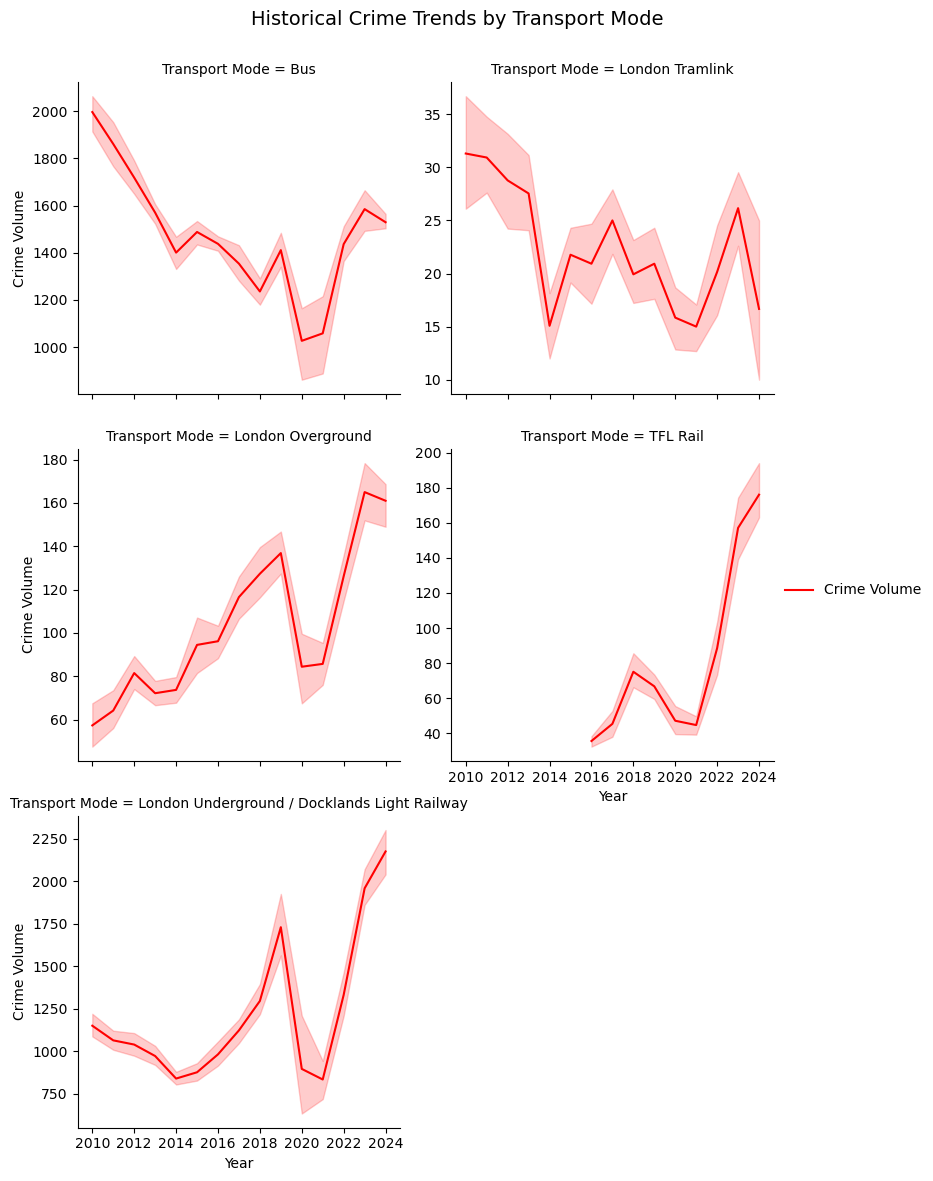

In [186]:
# small-multiple line graphs for transport mode crime rates trend over years
g = sns.FacetGrid(merged_df, col="Transport Mode", col_wrap=2, height=4, sharey=False)
g.map(sns.lineplot, "Year", "Crime Volume", color='red', label="Crime Volume")

# displaying every 2 years on x axis
for ax in g.axes.flatten():
    ax.set_xticks(range(int(merged_df['Year'].min()), int(merged_df['Year'].max()) + 1, 2))

# adding legend and title
g.add_legend()
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Historical Crime Trends by Transport Mode", fontsize=14)    

plt.show()

##### Interpretations

Bus: Crime volume on buses has stayed stable in the last ten years after a dip in early 2010s. Another dip could be observed in 2020 which might be due to a decrease in traffic volume. A slight increase in crime is visible in recent years.

London Tramlink: Crime volume has decreased over the years with a major dips in 2014 and recent years. Relative to other transport modes tramlink looks like a safer option.

London Overground: Crime volume has gradually increased over the years but not as sharply as the Underground.

TfL Rail: Crime volume has sharply increased after 2021. Before 2021 crime volume looks relatively low

London Underground/Docklands Light Railway: Crime volume has consistently increased over the years. With a dip in crime in 2020 it has regained its momentum and surpassed the last peak rather quickly.

##### Insights
London Underground/DLR remains the least safe mode of public transport. While modes like London Tramlink have shown consistently low crime rates.
The recent increase in crime volume may also be attributed better crime reporting in recent years.


#### Avg Crime Rate by Transport Mode

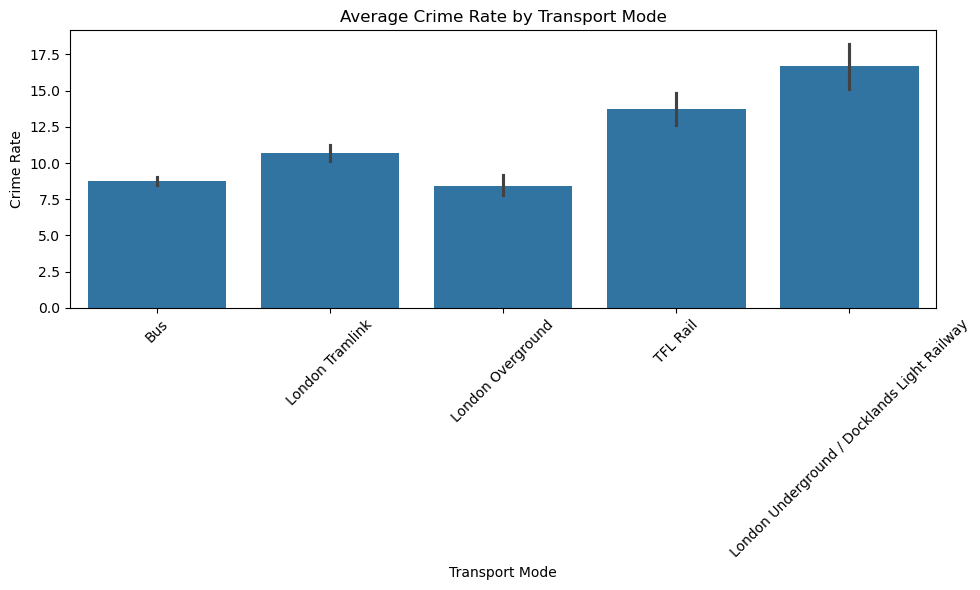

In [189]:

# creating bar graph for Crime Rate by Transport Mode
plt.figure(figsize=(10, 6))
sns.barplot(data= merged_df, x="Transport Mode", y="Rate", estimator="mean")

# adding title and labels
plt.title("Average Crime Rate by Transport Mode")
plt.ylabel("Crime Rate")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

##### Interpretations and Insights
London Underground/Docklands Light Railway has the highest crime rate among all transport modes which can likely be due to high traffic volume. London Tramlink shows moderate crime rates, lower than the Underground but higher than buses. Bus Services and London Overground appear to be the safest with  lower crime rates even with high volume of traffic. TFL Rail has higher crime rates compared to buses and trams but lower than the Underground.

#### Monthly Crime Rate and Traffic by Transport Mode

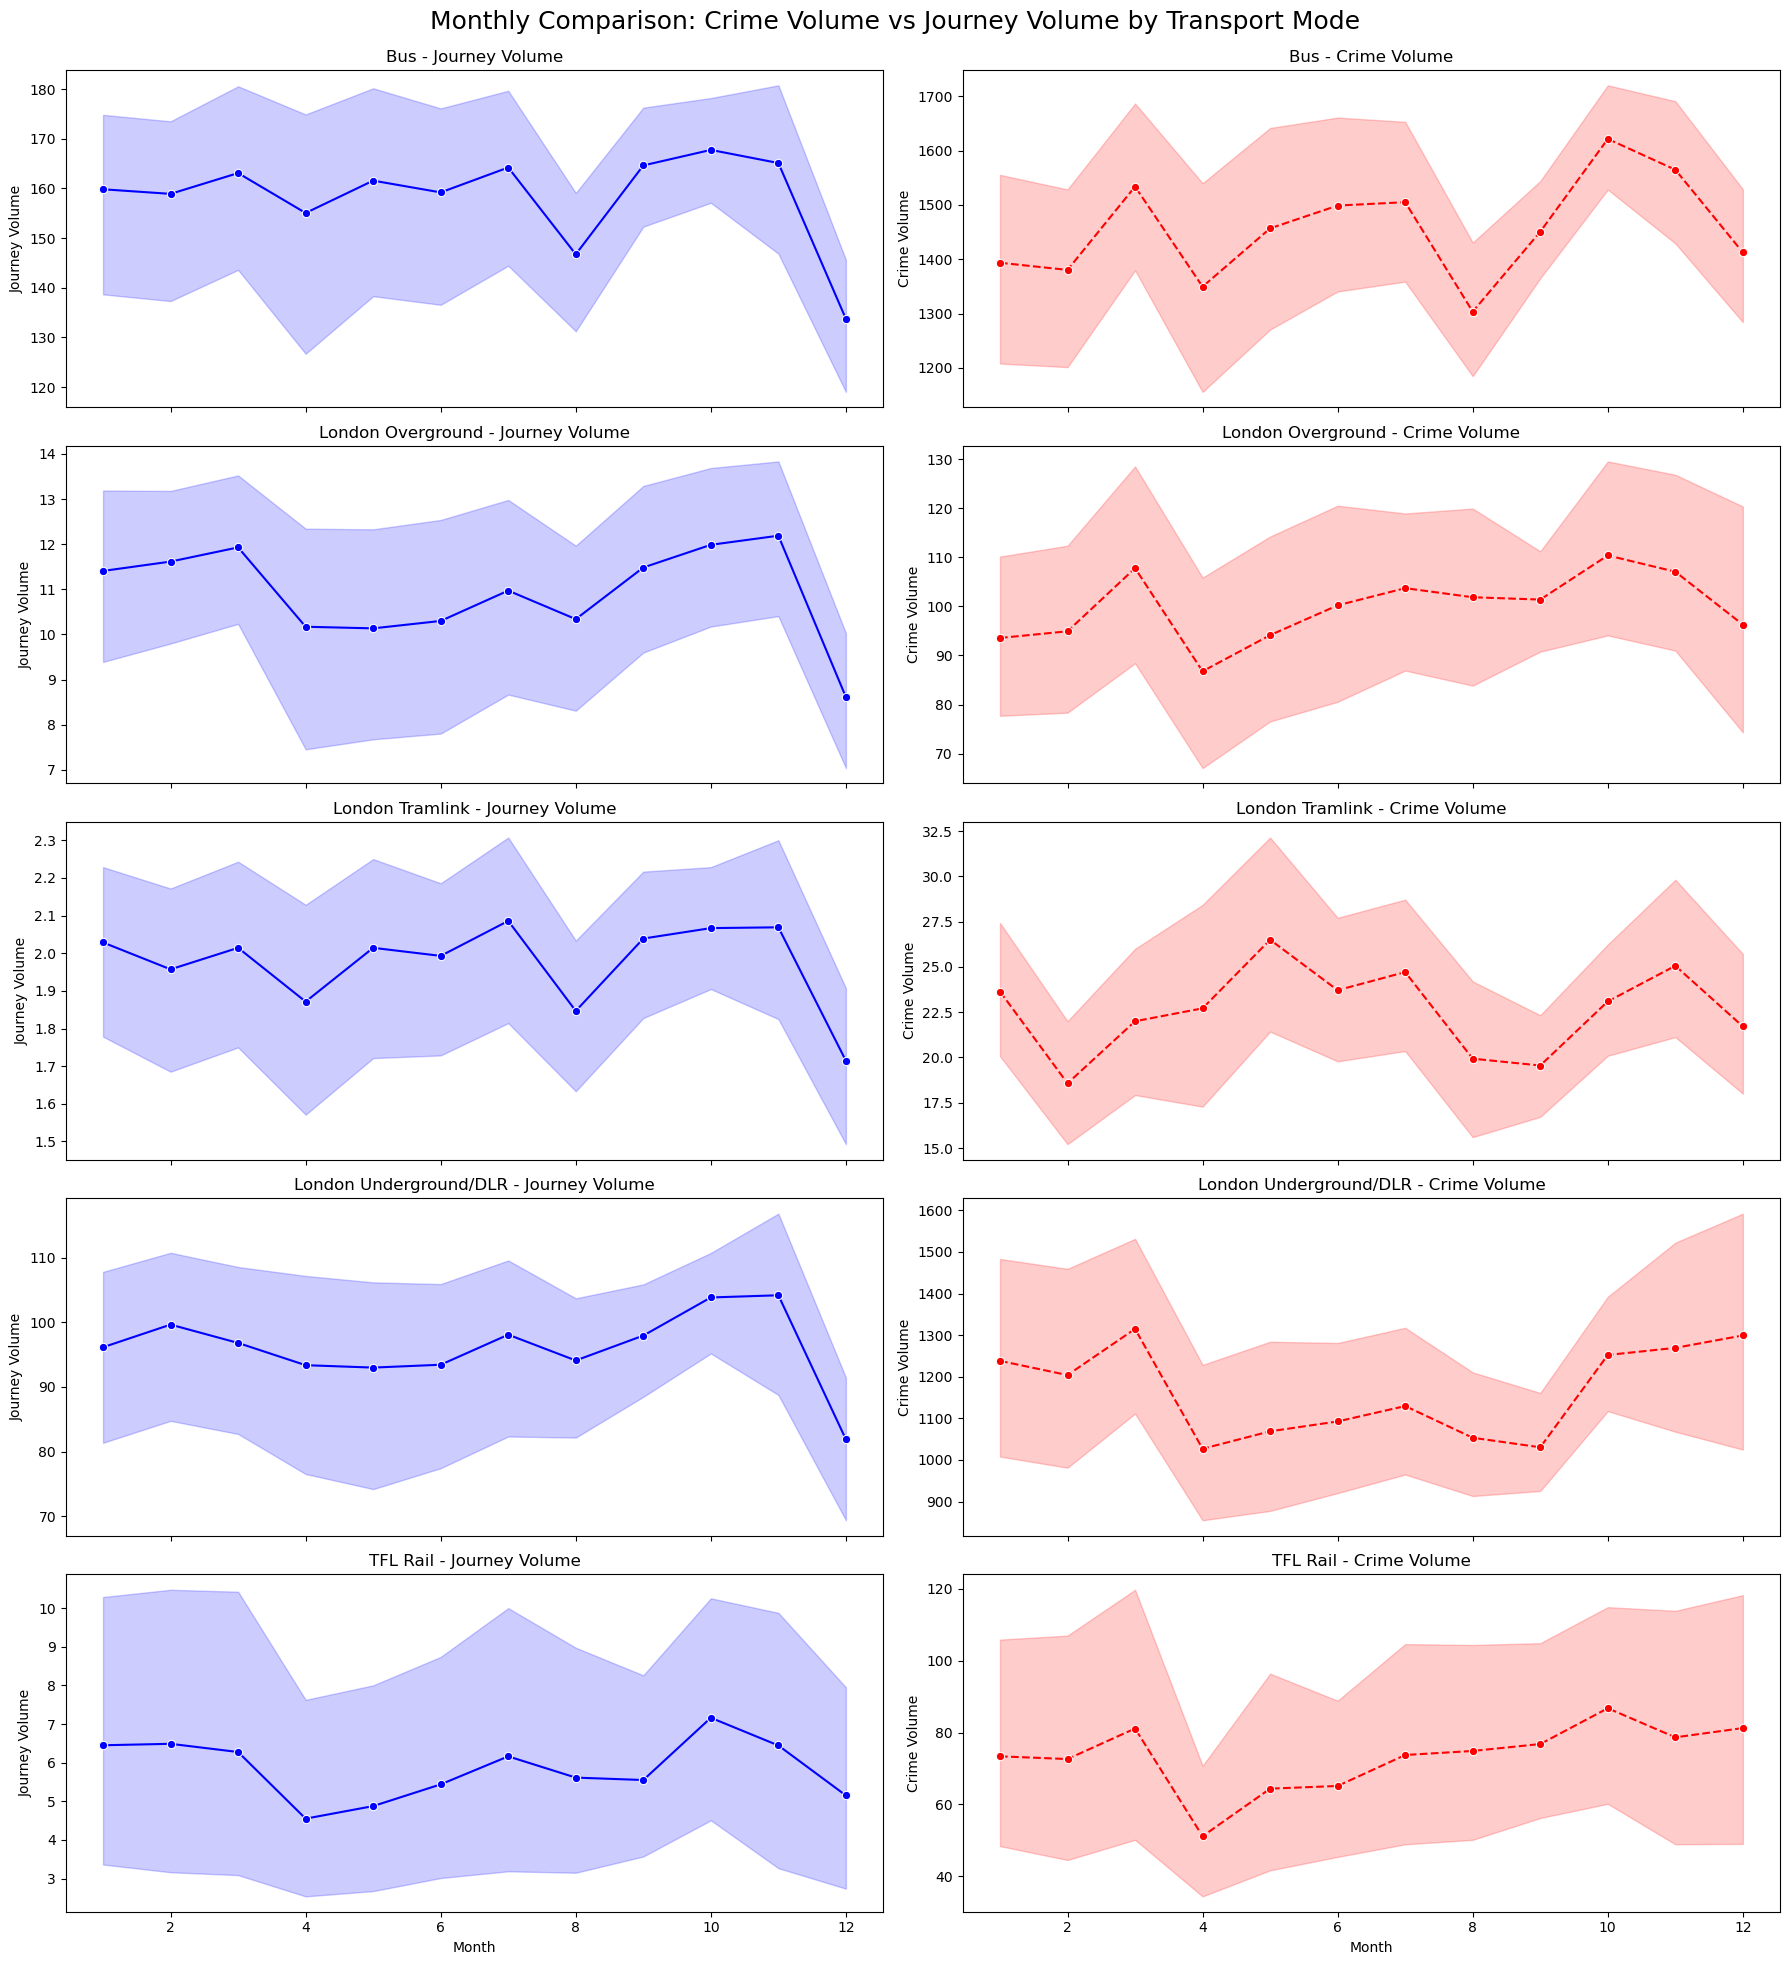

In [194]:

fig, axes = plt.subplots(5, 2, figsize=(18, 20), sharex=True)

# Bus
sns.lineplot(data=merged_df[merged_df['Transport Mode'] == "Bus"], x="Month", y="Volume", ax=axes[0, 0], marker="o", color="blue")
axes[0, 0].set_title("Bus - Journey Volume")
axes[0, 0].set_ylabel("Journey Volume")

sns.lineplot(data=merged_df[merged_df['Transport Mode'] == "Bus"], x="Month", y="Crime Volume", ax=axes[0, 1], marker="o", linestyle="--", color="red")
axes[0, 1].set_title("Bus - Crime Volume")
axes[0, 1].set_ylabel("Crime Volume")

# London Overground 
sns.lineplot(data=merged_df[merged_df['Transport Mode'] == "London Overground"], x="Month", y="Volume", ax=axes[1, 0], marker="o", color="blue")
axes[1, 0].set_title("London Overground - Journey Volume")
axes[1, 0].set_ylabel("Journey Volume")

sns.lineplot(data=merged_df[merged_df['Transport Mode'] == "London Overground"],
             x="Month", y="Crime Volume", ax=axes[1, 1], marker="o", linestyle="--", color="red")
axes[1, 1].set_title("London Overground - Crime Volume")
axes[1, 1].set_ylabel("Crime Volume")

# London Tramlink 
sns.lineplot(data=merged_df[merged_df['Transport Mode'] == "London Tramlink"], 
             x="Month", y="Volume", ax=axes[2, 0], marker="o", color="blue")
axes[2, 0].set_title("London Tramlink - Journey Volume")
axes[2, 0].set_ylabel("Journey Volume")

sns.lineplot(data=merged_df[merged_df['Transport Mode'] == "London Tramlink"],
             x="Month", y="Crime Volume", ax=axes[2, 1], marker="o", linestyle="--", color="red")
axes[2, 1].set_title("London Tramlink - Crime Volume")
axes[2, 1].set_ylabel("Crime Volume")

# London Underground/DLR 
sns.lineplot(data=merged_df[merged_df['Transport Mode'] == "London Underground / Docklands Light Railway"],
             x="Month", y="Volume", ax=axes[3, 0], marker="o", color="blue")
axes[3, 0].set_title("London Underground/DLR - Journey Volume")
axes[3, 0].set_ylabel("Journey Volume")

sns.lineplot(data=merged_df[merged_df['Transport Mode'] == "London Underground / Docklands Light Railway"], 
             x="Month", y="Crime Volume", ax=axes[3, 1], marker="o", linestyle="--", color="red")
axes[3, 1].set_title("London Underground/DLR - Crime Volume")
axes[3, 1].set_ylabel("Crime Volume")

# TFL Rail 
sns.lineplot(data=merged_df[merged_df['Transport Mode'] == "TFL Rail"], 
             x="Month", y="Volume", ax=axes[4, 0], marker="o", color="blue")
axes[4, 0].set_title("TFL Rail - Journey Volume")
axes[4, 0].set_ylabel("Journey Volume")

sns.lineplot(data=merged_df[merged_df['Transport Mode'] == "TFL Rail"], 
             x="Month", y="Crime Volume", ax=axes[4, 1], marker="o", linestyle="--", color="red")
axes[4, 1].set_title("TFL Rail - Crime Volume")
axes[4, 1].set_ylabel("Crime Volume")

# Adjusting layout 
plt.tight_layout()
plt.suptitle("Monthly Comparison: Crime Volume vs Journey Volume by Transport Mode", fontsize=18)
plt.subplots_adjust(top=0.95)

# Show the plot
plt.show()


##### Insights 
Buses consistently have the highest journey volume across the months but crime volume still remains relatively stable despite high journey volume.
London Overground's journey volume has remained steady but lower than buses and the underground hence the crime volume is relatively low and consistent throughout the year.
London Tramlink has the lowest passenger volume among all modes hence crime incidents remain negligible across the year.
London Underground/DLR has significant passenger volume and consistently higher crime volume compared to other modes.
TfL Rail has steady passenger volume without major fluctuations and low crime volume.

##### Observations
London Underground/DLR consistently reports the highest crime rates, possibly due to crowded conditions and station design.
Tramlink and London Overground show low crime volumes, indicating safer conditions and lower passenger density.
Crime volume peaks during summer and winter holidays during peak travel periods.

## Data Export

In [212]:
#exporting cleaned csvs
crime_df.to_csv("crime_df.csv", index=False)
journey_df.to_csv("journey_df.csv", index=False)
merged_df.to_csv("crime_journey_merged.csv", index=False)

#exporting visualizations as pngs
plt.savefig(r'C:\Users\arsal\OneDrive\Desktop\monthly_comparison_crime_vs_journey.png')
plt.savefig(r'C:\Users\arsal\OneDrive\Desktop\avg_crime_transport_mode.png')
plt.savefig(r'C:\Users\arsal\OneDrive\Desktop\transport_modes_crime_volume.png')

#Uploaded to Github
https://github.com/arsalanparacha/tfl

## Conclusion

This project provides a detailed analysis of crime and journey volumes for various public trasport modes in London. It highlights historical and seasonal crime trends and rates. The results suggest that bus and underground services are the busiest and the least safest transport modes with notable spikes in summer and winter holidays. Other transport modes show lower crime rate that can also be attributed to lower traffic volumes. 

There is a positive correlation between journey and crime volume which suggests that increased passenger traffic leads to higher crime rates. This calls for targetted surveillance during peak seasons to get better control on crime rates e.g. increased patroling on london underground during summer holidays.   

Interestingly, bus services, having the highest passenger traffic, did not have proportionally higher crime rates. This could be due to driver being present, real-time cctv monitoring, and frequent stops. Moving forward Tfl should focus on enhanced surveillance, public awareness campaigns and data-driven decision making for London's public transport to become safer for all passengers.

## References

London Assembly, London Datastore. Transport Crime in London. Retrieved from www.data.london.gov.uk

Corey Schafer Tutorials on Youtube. https://www.youtube.com/user/schafer5.
OpenAI. (2024) ChatGPT (January 2024 version). Available at: https://chat.openai.com (Accessed: January 2025).

Newton, A. D., Partridge, H., & Gill, A. (2014). Above and below: measuring crime risk in and around underground mass transit systems. Crime Science, 3(1), 1-11. Available at: https://crimesciencejournal.biomedcentral.com/articles/10.1186/2193-7680-3-1 (Accessed: 14 January 2025).

London Assembly Police and Crime Committee. (2015). Crime on public transport. London: Greater London Authority. Available at: https://www.london.gov.uk/sites/default/files/crime_on_public_transport.pdf (Accessed: 14 January 2025).